<a href="https://colab.research.google.com/github/aruntakhur/GEU_ML_2024/blob/main/LinearRegressionLab2_GEU2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
x = np.linspace (0, 2*np.pi, 100)
# Actual function
y = np.sin(x)

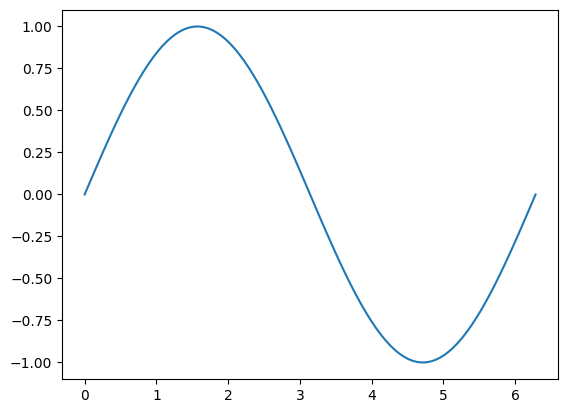

In [70]:
# Plotting the real function (scatter)
plt.plot (x, y)

In [71]:
# Create dataset
x_data = np.linspace (0, 2*np.pi, 10)
# Actual function
y_data = np.sin(x_data)

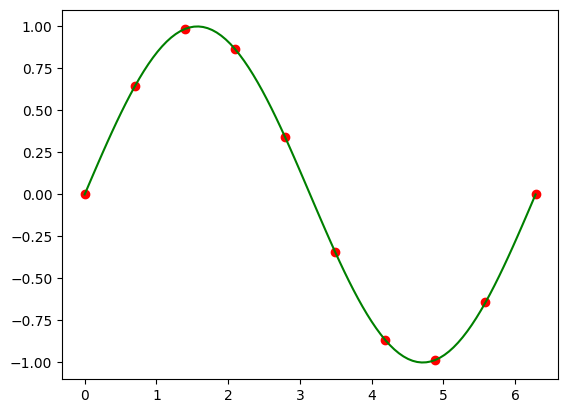

In [72]:
# Plotting the real function (scatter)

plt.plot (x, y, c = 'g')
plt.scatter(x_data, y_data, c = 'r')

In [73]:
# Creating dataset with random normal noise added to function
y_data_noise = np.sin (x_data) + np.random.normal (0,0.1, 10)

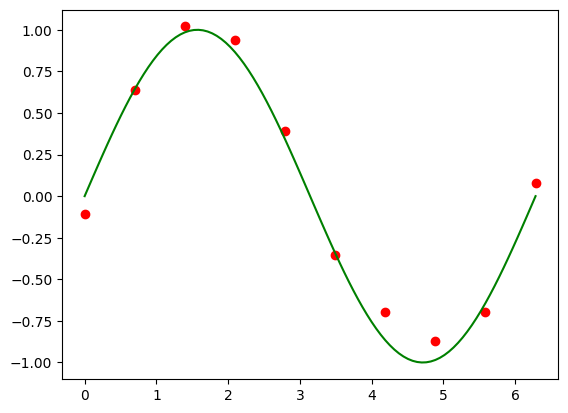

In [74]:
plt.plot (x, y, c = 'g')
plt.scatter(x_data, y_data_noise, c = 'r')

In [75]:
# General functiont with take x data matrix of D dimension and o order to create a M dimension data matrix X
def data (x, m):
  m = m + 1
  X_df = []
  for i in x:
    x_pre = []
    for j in range (m):
      x_pre.append (i**j)
    X_df.append (x_pre)
  X_df = pd.DataFrame (X_df)
  return X_df

In [87]:
# Create data frame of data x with order 5 (passing through 5 ba)
X = data (x_data, 3)
X

,0,1,2,3
0,1.0,0.000000,0.000000,0.000000
1,1.0,0.698132,0.487388,0.340261
2,1.0,1.396263,1.949551,2.722087
3,1.0,2.094395,4.386491,9.187045
4,1.0,2.792527,7.798206,21.776699
5,1.0,3.490659,12.184697,42.532615
6,1.0,4.188790,17.545963,73.496360
7,1.0,4.886922,23.882006,116.709497
8,1.0,5.585054,31.192824,174.213593
9,1.0,6.283185,39.478418,248.050213


# Compute the value of w as explined in the lecture as follows:
$W = (X^TX)^{-1}X^TY$

In [77]:
def find_weights (X, Y):
  XtY = np.matmul (X.T, Y)
  XtX = np.matmul (X.T, X)
  XtX_inv = np.linalg.inv (XtX)
  return np.matmul (XtX_inv, XtY)

In [83]:
def linear_regression (x, y, m):
  X_df = data (x, m)
  w = find_weights (X_df.values, y)
  plt.scatter (x, y, color = "grey")
  val = np.linspace (min (x), max(x), 100)
  plt.plot (val, np.matmul (data (val, m).values, w), color = "red")
  return w

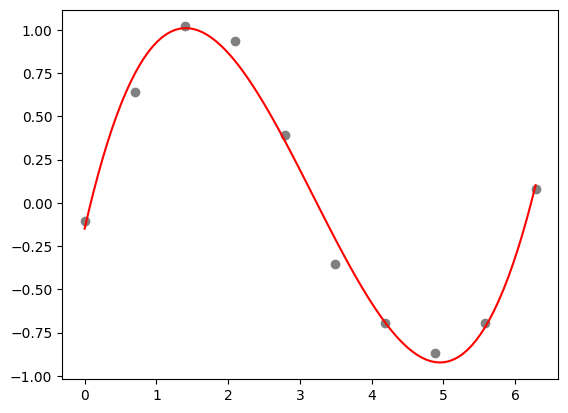

In [88]:
w = linear_regression (x_data, y_data_noise, 3)

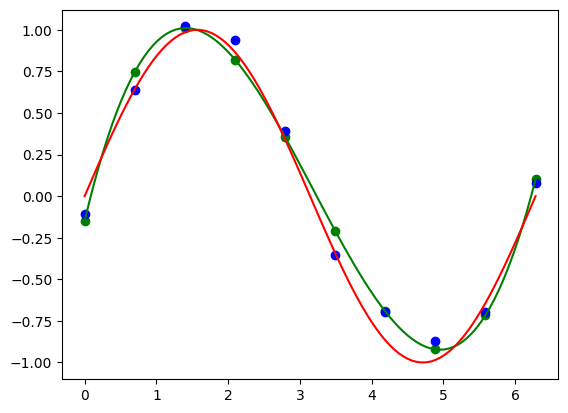

In [89]:
plt.scatter (x_data, np.matmul(X.values, w), color= "green")
val = np.linspace (0, 2*np.pi, 100)
plt.plot (val, np.matmul (data (val, 3).values, w), color = "green")
plt.scatter (x_data, y_data_noise, color="blue")
plt.plot (val, np.sin (val), color = "red")
plt.show ()